In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('../data/voice_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,label,emotions
0,-573.379150,34.064041,-33.337578,3.489916,-13.482152,-6.327230,-17.734171,-15.280941,-8.379515,-0.323866,...,-0.323118,-0.797864,-0.332338,0.177740,0.204333,-0.211895,0.080943,-0.274973,6,fearful
1,-545.244568,38.073475,-8.023163,7.236882,-13.688817,-2.157916,-12.315373,-7.948586,-14.858138,1.719064,...,0.066087,0.029629,-0.052548,-0.059842,-0.084479,0.181888,0.202147,-0.165808,5,angry
2,-690.535461,43.141396,-9.854416,10.819540,-14.295117,-2.288000,-10.151420,-4.941710,-6.615477,-2.972474,...,0.057103,-0.174446,-0.116118,0.133232,0.191797,-0.322106,-0.287355,0.132173,8,surprise
3,-553.611633,41.233486,-9.912664,8.587062,-5.737630,-5.831647,-17.839375,-11.084945,-11.369494,3.470583,...,0.015315,0.068387,0.201094,-0.062219,-0.291406,-0.284542,0.070689,0.088308,6,fearful
4,-576.153442,49.947994,-13.857949,8.248825,-12.159565,0.193612,-8.719680,-7.731155,-8.692744,0.833810,...,-0.276208,-0.723615,0.074101,0.027505,0.288559,-0.022368,0.053056,0.346106,5,angry


In [4]:
df.drop(inplace=True, columns=["label"])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,emotions
0,-573.379150,34.064041,-33.337578,3.489916,-13.482152,-6.327230,-17.734171,-15.280941,-8.379515,-0.323866,...,0.428459,-0.323118,-0.797864,-0.332338,0.177740,0.204333,-0.211895,0.080943,-0.274973,fearful
1,-545.244568,38.073475,-8.023163,7.236882,-13.688817,-2.157916,-12.315373,-7.948586,-14.858138,1.719064,...,-0.031505,0.066087,0.029629,-0.052548,-0.059842,-0.084479,0.181888,0.202147,-0.165808,angry
2,-690.535461,43.141396,-9.854416,10.819540,-14.295117,-2.288000,-10.151420,-4.941710,-6.615477,-2.972474,...,0.236663,0.057103,-0.174446,-0.116118,0.133232,0.191797,-0.322106,-0.287355,0.132173,surprise
3,-553.611633,41.233486,-9.912664,8.587062,-5.737630,-5.831647,-17.839375,-11.084945,-11.369494,3.470583,...,-0.129597,0.015315,0.068387,0.201094,-0.062219,-0.291406,-0.284542,0.070689,0.088308,fearful
4,-576.153442,49.947994,-13.857949,8.248825,-12.159565,0.193612,-8.719680,-7.731155,-8.692744,0.833810,...,0.525122,-0.276208,-0.723615,0.074101,0.027505,0.288559,-0.022368,0.053056,0.346106,angry


In [5]:
target = df["emotions"]

In [6]:
data = df.drop("emotions", axis=1)
feature_names = data.columns
data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-573.379150,34.064041,-33.337578,3.489916,-13.482152,-6.327230,-17.734171,-15.280941,-8.379515,-0.323866,...,-0.334692,0.428459,-0.323118,-0.797864,-0.332338,0.177740,0.204333,-0.211895,0.080943,-0.274973
1,-545.244568,38.073475,-8.023163,7.236882,-13.688817,-2.157916,-12.315373,-7.948586,-14.858138,1.719064,...,-0.079512,-0.031505,0.066087,0.029629,-0.052548,-0.059842,-0.084479,0.181888,0.202147,-0.165808
2,-690.535461,43.141396,-9.854416,10.819540,-14.295117,-2.288000,-10.151420,-4.941710,-6.615477,-2.972474,...,-0.045710,0.236663,0.057103,-0.174446,-0.116118,0.133232,0.191797,-0.322106,-0.287355,0.132173
3,-553.611633,41.233486,-9.912664,8.587062,-5.737630,-5.831647,-17.839375,-11.084945,-11.369494,3.470583,...,-0.175183,-0.129597,0.015315,0.068387,0.201094,-0.062219,-0.291406,-0.284542,0.070689,0.088308
4,-576.153442,49.947994,-13.857949,8.248825,-12.159565,0.193612,-8.719680,-7.731155,-8.692744,0.833810,...,-0.403427,0.525122,-0.276208,-0.723615,0.074101,0.027505,0.288559,-0.022368,0.053056,0.346106


In [7]:
data.columns.tolist()

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127']

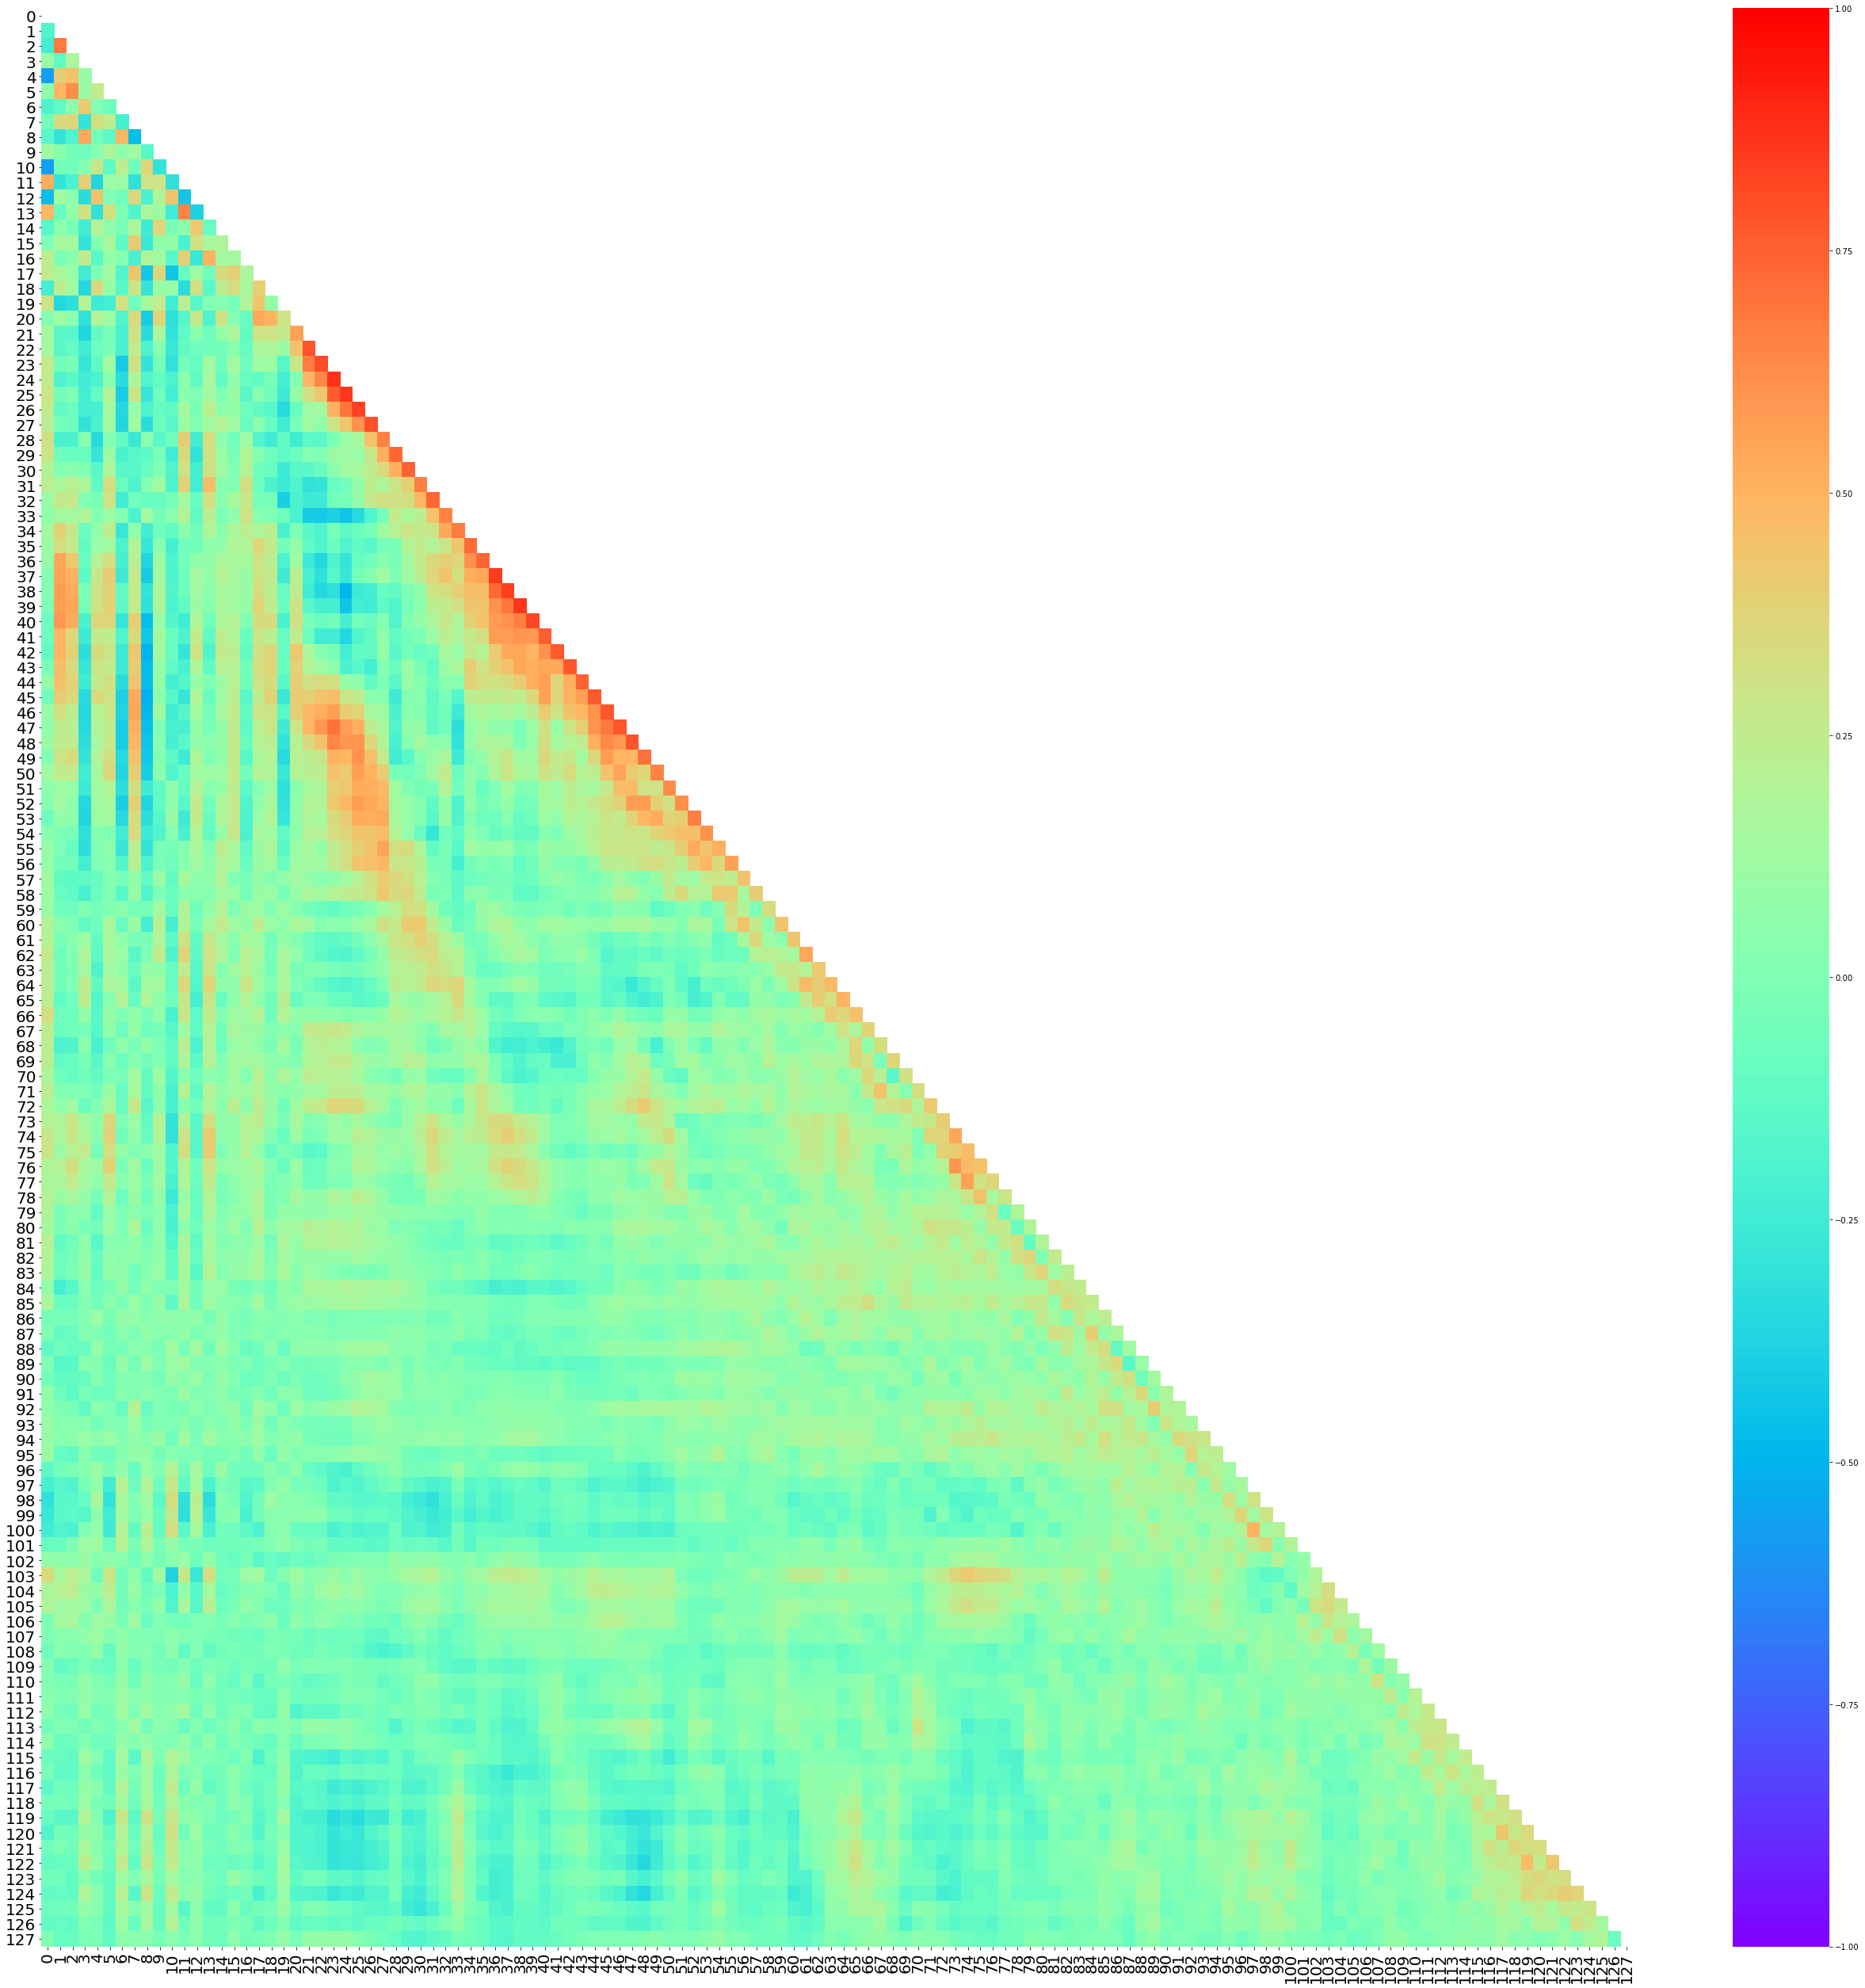

In [8]:
import seaborn as sns

#Correlation heatmap
#Correlation matrix = X.corr()

plt.figure(figsize=(45,45)) 
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, cmap='rainbow')
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 20)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 20)
plt.savefig("heatmap1.png")

In [9]:
data = data.drop(columns=['0','1','2','3','4','5','6','7','8','9','10',
                          '11', '18', 
                          '21','22','23','24','25','26','27','28','29','30',
                          '31','32','33','34','35','36','37','38','39','40',
                          '41','42','43','44','45','46','47','48','49','50',
                          '51','52','53','54','55','56',
                          '73','74','75', '76', '77', '78', '79',
                          '91','97','117', '118', '119', '120', '121', '122',
                          '93', '111', '87', '83', '105', '116', '109', '127', '108', '86', '112', '126', '114', '102'])  

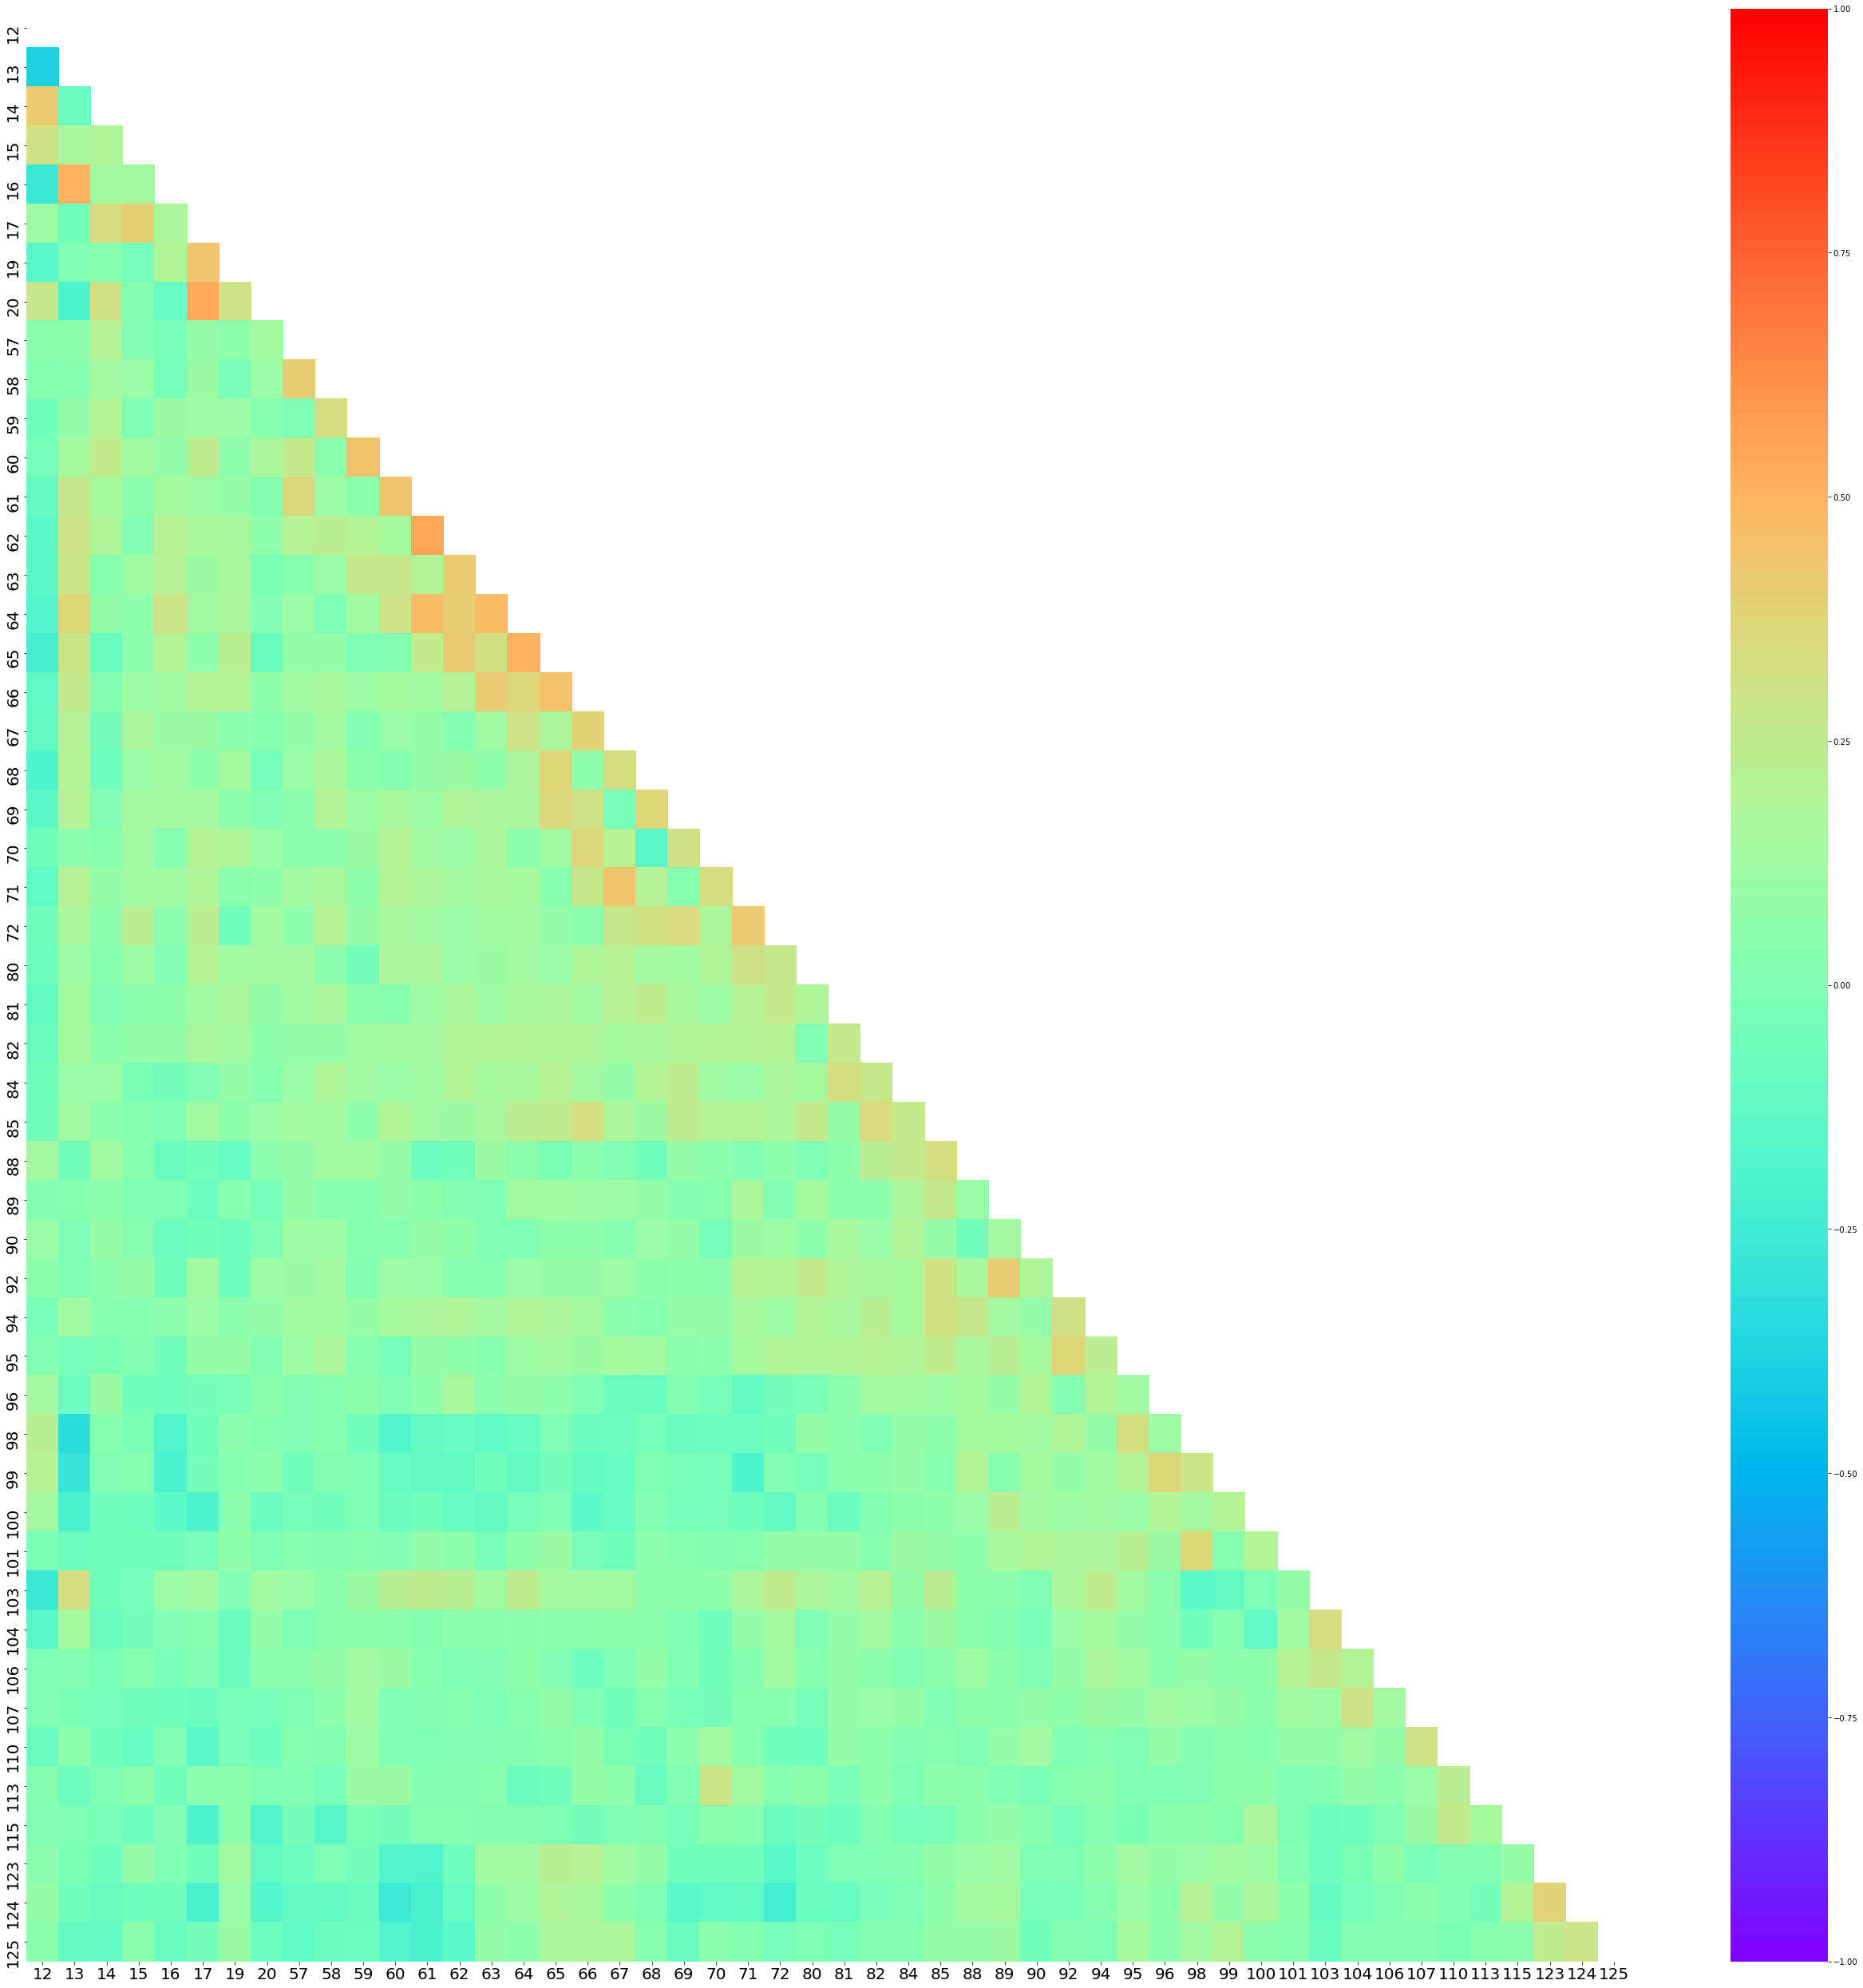

In [10]:
plt.figure(figsize=(45,45)) 
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, cmap='rainbow')
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 20)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 20)
plt.savefig("heatmap2.png")

In [16]:
model = RandomForestClassifier().fit(data,target)
important_df = pd.DataFrame({"feature": data.columns, \
                           "Importance": model.feature_importances_})
important_sort = important_df.sort_values("Importance", ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(important_sort)

   feature  Importance
6       19    0.062920
5       17    0.062391
7       20    0.044313
0       12    0.032387
1       13    0.031069
4       16    0.030323
3       15    0.029105
2       14    0.025282
15      64    0.022364
20      69    0.021675
11      60    0.021132
8       57    0.021060
9       58    0.018942
16      65    0.017834
13      62    0.017080
40      98    0.015770
41      99    0.015753
28      84    0.015290
42     100    0.014724
10      59    0.014429
19      68    0.014116
18      67    0.014070
21      70    0.013832
46     104    0.013488
23      72    0.013483
57     115    0.013333
12      61    0.013260
14      63    0.012866
34      90    0.012393
17      66    0.012367
45     103    0.012250
43     101    0.012085
35      92    0.011371
22      71    0.011247
33      89    0.011182
25      81    0.011116
60     124    0.011082
32      88    0.010941
38      95    0.010644
24      80    0.010439
59     123    0.010424
29      85    0.010359
26      82 

In [17]:
col_one_list = important_df.sort_values("Importance", ascending=False)['feature'].tolist()
print(col_one_list)

['19', '17', '20', '12', '13', '16', '15', '14', '64', '69', '60', '57', '58', '65', '62', '98', '99', '84', '100', '59', '68', '67', '70', '104', '72', '115', '61', '63', '90', '66', '103', '101', '92', '71', '89', '81', '124', '88', '95', '80', '123', '85', '82', '94', '113', '125', '96', '106', '110', '107', '93', '111', '87', '83', '105', '116', '109', '127', '108', '86', '112', '126', '114', '102']


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [12]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.7556306306306306

In [14]:
from sklearn.metrics import classification_report
predictions = rf.predict(X_test_scaled)
print(classification_report(y_test, predictions,))

              precision    recall  f1-score   support

       angry       0.66      0.76      0.71       136
     disgust       0.64      0.93      0.76       162
     fearful       0.85      0.74      0.79       145
       happy       0.85      0.62      0.72       142
         sad       0.89      0.70      0.78       156
    surprise       0.77      0.77      0.77       147

    accuracy                           0.76       888
   macro avg       0.78      0.75      0.76       888
weighted avg       0.78      0.76      0.76       888



In [15]:
import joblib
filename = 'rf3_model.sav'
joblib.dump(rf, filename)

['rf3_model.sav']

In [16]:

filename1 = 'scaler.sav'
joblib.dump(X_scaler, filename1)

['scaler.sav']